In [ ]:
import sys
from os import path
import os
from dotenv import load_dotenv

load_dotenv()
sys.path.append(path.dirname(os.getcwd()))

hf_token = os.environ["HUGGING_FACE_API_KEY"]


In [2]:
import json
import pandas as pd
from project.models import YouTubeVideoInfo

with open("../data/myyounicon-01/videos_infos.json", "r") as json_file:
    videos = [YouTubeVideoInfo.from_json(v) for v in json.load(json_file)]

labels = pd.read_csv("../data/YouNiCon/conspiracy_label.csv")
labels = labels[labels["video_id"].isin([v.id for v in videos])]
conspiracy_videos = labels[labels["majority_label"] == 1] 
non_conspiracy_videos = labels[labels["majority_label"] == 0] 

print(f"Total instances: {len(labels)}, conspiracy instances: {len(conspiracy_videos)}, non conspiracy instances: {len(non_conspiracy_videos)}")

Total instances: 2515, conspiracy instances: 897, non conspiracy instances: 1618


In [3]:
print(set(c for v in videos for c in v.categories))
print(set(c for v in videos for c in v.tags))


{'Gaming', 'Autos & Vehicles', 'Travel & Events', 'Nonprofits & Activism', 'Sports', 'Pets & Animals', 'News & Politics', 'People & Blogs', 'Science & Technology', 'Comedy', 'Entertainment', 'Music', 'Education', 'Howto & Style', 'Film & Animation'}
{'Judge', 'jfk jr lives', 'Wasps', 'pole dancers', 'Twitter', 'Jesus Old Law', 'associated', 'salvation equation', 'zero', 'Program', '2017 BIGGEST NEWS STORY', 'doug evans', 'Diamond', 'Hidden system of finance', 'EndTime Prophecies', 'The Suspicious Activities around the JFK Assassination and the Car that Disappeared', 'website design', 'columbus', 'JFK ASSASSINATION', 'jet engines', 'england', 'Fuji X-T1', 'JohnKuhles', 'DefaultTag', 'eye of christ', 'Fukushima Daiichi', 'Mathematics', 'angel', 'cairo fish millions', 'hymns', 'Top Secret', 'mellen', 'playstation 5 games', 'flat earth children', 'Shuttle', 'what', 'European Space Agency', 'Jason Bermas', 'Snow white and seven dwarfs', 'aphrodite', 'pleideians', 'Chiun', 'Utsler', 'pronóst

In [4]:
print(videos[33].to_string_for_model_input(["channel_title", "title", "description", "tags", "auto_subtitles", "comments", "subtitles"], 100, True))

**channel_title**: Trump Breaking News Network

**title**: Hillary Clinton 'Nervous Breakdown' With No Options Left Now But to Run

**description**: Trump Breaking News Network - 

Source: 

Trump Breaking News Network - TBNN
https://www.youtube.com/channel/UC6KZqfNgPrGEJDRIUTHPwrQ

junenela54, 
junenela63

For the latest new about Donald Trump and his presidency. Stay tuned.
Share and like.

'Copyright Disclaimer Under Section 107 of the Copyright Act 1976, allowance is made for 'fair use' for purposes such as criticism, comment, news reporting, teaching, scholarship, and research. Fair use is a use permitted by copyright statute that might otherwise be infringing. Non-profit, educational or personal use tips the balance in favor of fair use'

Copyright Disclaimer: Citation of articles and authors in this report does not imply ownership. Works and images presented here fall under Fair Use Section 107 and are used for commentary on globally significant newsworthy events. Under Section 

## Text Only Models

In [ ]:
from huggingface_hub import InferenceClient
from project.llm_models import prompts
from project.experiments.models import Experiment
from datetime import datetime, timezone
import time


hf = InferenceClient(token=hf_token)

description = ""
experiment_id = str(round(time.time()))
start_time = datetime.now(timezone.utc)

models = ["meta-llama/Llama-3.3-70B-Instruct"] # ["meta-llama/Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.2", "google/gemma-1.1-7b-it"] # LLama3 (8B), Mistral (7B), Gemma (7B)
system_roles = ["system", "system", None]
system_prompt = prompts.tiktok_paper_simple_prompt()
attributes = ["channel_title", "title", "description", "categories", "tags", "subtitles", "auto_subtitles", "comments"]
attributes_settings = {
    "max_subtitles_length": 1000, 
    "include_comments_replies": True,
}

completions_by_model = {}

for model, system_role in zip(models, system_roles):
    completions_by_model[model] = {}
    for i, video in enumerate(videos):
        print(f"Processing video {i + 1}/{len(videos)} ⚙️")

        user_prompt = video.to_string_for_model_input(attributes_to_include=attributes, max_subtitles_length=attributes_settings["max_subtitles_length"], include_comments_replies=attributes_settings["include_comments_replies"])

        messages = [
            {
                "role": system_role,
                "content": system_prompt,
            },
            {
                "role": "user",
                "content": user_prompt,
            },
        ] if system_role else [
            {
                "role": "user",
                "content": f"{system_prompt}\n\n{user_prompt}"
            }
        ]
        try:
            completion = hf.chat.completions.create(
                model=model, 
                messages=messages, 
            )
        except Exception as exception:
            completion = str(exception)
            print(completion)
            
        completions_by_model[model][video.id] = completion

end_time = datetime.now(timezone.utc)


Processing video 1/2515 ⚙️
Processing video 2/2515 ⚙️
Processing video 3/2515 ⚙️
Processing video 4/2515 ⚙️
Processing video 5/2515 ⚙️
Processing video 6/2515 ⚙️
Processing video 7/2515 ⚙️
Processing video 8/2515 ⚙️
Processing video 9/2515 ⚙️
Processing video 10/2515 ⚙️
Processing video 11/2515 ⚙️
Processing video 12/2515 ⚙️
Processing video 13/2515 ⚙️
Processing video 14/2515 ⚙️
Processing video 15/2515 ⚙️
Processing video 16/2515 ⚙️
Processing video 17/2515 ⚙️
Processing video 18/2515 ⚙️
Processing video 19/2515 ⚙️
Processing video 20/2515 ⚙️
Processing video 21/2515 ⚙️
Processing video 22/2515 ⚙️
Processing video 23/2515 ⚙️
Processing video 24/2515 ⚙️
Processing video 25/2515 ⚙️
Processing video 26/2515 ⚙️
Processing video 27/2515 ⚙️
Processing video 28/2515 ⚙️
Processing video 29/2515 ⚙️
Processing video 30/2515 ⚙️
Processing video 31/2515 ⚙️
Processing video 32/2515 ⚙️
Processing video 33/2515 ⚙️
Processing video 34/2515 ⚙️
Processing video 35/2515 ⚙️
Processing video 36/2515 ⚙️
P

In [ ]:
import json
from project.utils.json_utils import EnhancedJSONEncoder
from project.experiments.models import Experiment

experiment = Experiment.from_completions(
    attributes_settings=attributes_settings,
    attributes=attributes,
    completions_by_model=completions_by_model,
    description=description,
    end_time=end_time,
    id=experiment_id,
    image_filename_format=None,
    models=models,
    start_time=start_time,
    system_prompt=system_prompt,
)

with open(f"experiment-{experiment_id}.json", "w") as f:
    json.dump(experiment, f, cls=EnhancedJSONEncoder)

    

In [ ]:
# TMP: read predicted labels
import json

with open(f"{model.replace("/", "-")}-predicted_labels.json", "r") as f:
    predicted_labels_dic = json.load(f)

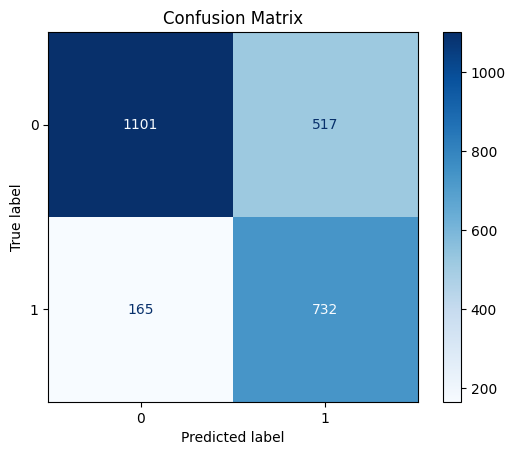

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1618
           1       0.59      0.82      0.68       897

    accuracy                           0.73      2515
   macro avg       0.73      0.75      0.72      2515
weighted avg       0.77      0.73      0.73      2515



In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

video_ids = sorted([video.id for video in videos])
true_labels = labels.set_index("video_id").loc[video_ids, "majority_label"].tolist()
predicted_labels = [predicted_labels_dic[id] for id in video_ids]

conf_matrix = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["0", "1"])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

print(classification_report(true_labels, predicted_labels))